In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

2022-12-30 11:20:20.288481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-30 11:20:20.947906: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-30 11:20:20.947952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-30 11:20:20.947958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load the Wine dataset
X, y = datasets.load_wine(return_X_y=True)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# Define the model
model = tf.keras.Sequential()

# Add layers to the model
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(13,)))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

2022-12-30 09:46:37.721089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 09:46:37.746091: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 09:46:37.746263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 09:46:37.746905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [4]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1/5 [=====>........................] - ETA: 3s - loss: 1.0527 - accuracy: 0.4375

2022-12-30 09:46:38.931915: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1bbd6900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-30 09:46:38.931934: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2022-12-30 09:46:38.944474: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-30 09:46:38.968373: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 1s 34ms/step - loss: 1.0515 - accuracy: 0.5000 - val_loss: 1.0788 - val_accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 1.0393 - accuracy: 0.5915 - val_loss: 1.0670 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 1.0285 - accuracy: 0.6972 - val_loss: 1.0558 - val_accuracy: 0.5556
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 1.0180 - accuracy: 0.6972 - val_loss: 1.0448 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 1.0077 - accuracy: 0.7183 - val_loss: 1.0362 - val_accuracy: 0.5556
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9993 - accuracy: 0.7465 - val_loss: 1.0266 - val_accuracy: 0.5556
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9909 - accuracy: 0.7042 - val_loss: 1.0181 - val_accuracy: 0.5556
Epoch 8/50
5/5 [============================

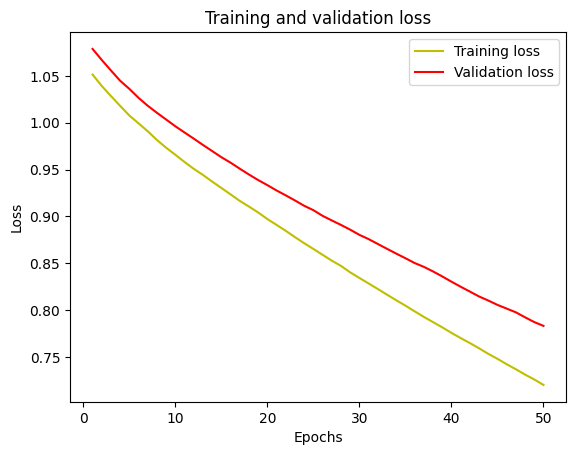

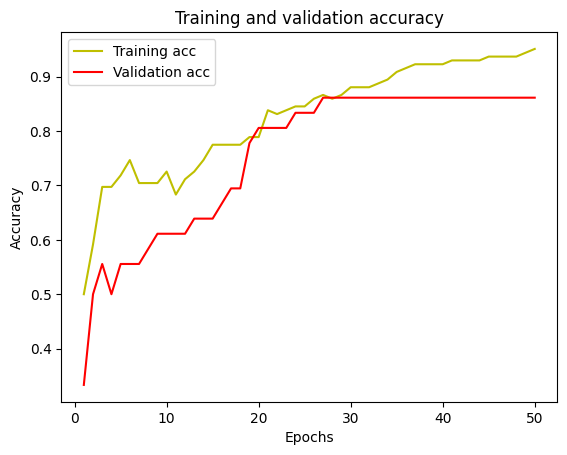

In [5]:


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## input and output only

In [6]:
model = tf.keras.Sequential()

# Add layers to the model
model.add(tf.keras.layers.Dense(units=3, activation='softmax', input_shape=(13,)))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1/5 [=====>........................] - ETA: 1s - loss: 1.1005 - accuracy: 0.3125

2022-12-30 09:46:41.206787: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


5/5 [==============================] - 0s 26ms/step - loss: 1.0864 - accuracy: 0.3451 - val_loss: 1.0831 - val_accuracy: 0.3056
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0752 - accuracy: 0.3451 - val_loss: 1.0741 - val_accuracy: 0.3056
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0662 - accuracy: 0.3451 - val_loss: 1.0652 - val_accuracy: 0.3056
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 1.0567 - accuracy: 0.3451 - val_loss: 1.0570 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 1.0471 - accuracy: 0.3592 - val_loss: 1.0495 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 1.0399 - accuracy: 0.3592 - val_loss: 1.0423 - val_accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0311 - accuracy: 0.3662 - val_loss: 1.0359 - val_accuracy: 0.3333
Epoch 8/10
5/5 [============================

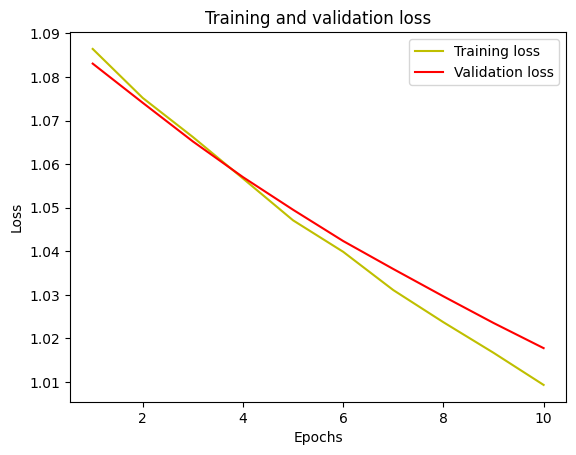

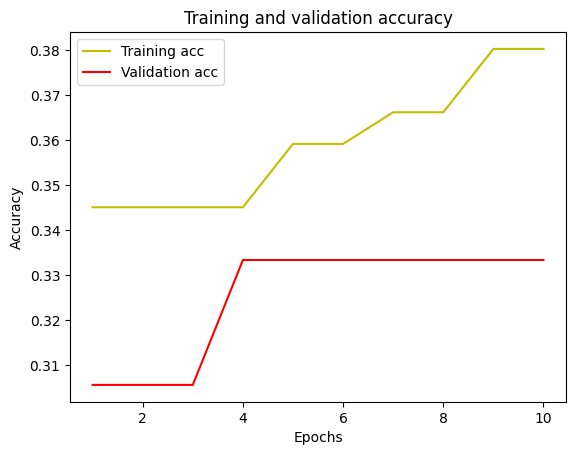

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## one hidden layer

In [3]:
model3 = tf.keras.Sequential()

# Add layers to the model3
model3.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(13,)))
model3.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


2022-12-30 11:20:34.754378: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 11:20:34.780736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 11:20:34.780901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 11:20:34.781389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [4]:
history = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


2022-12-30 11:20:39.693734: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1bc85050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-30 11:20:39.693753: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2022-12-30 11:20:39.697409: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-30 11:20:39.753048: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-30 11:20:39.785434: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 1s 32ms/step - loss: 1.0573 - accuracy: 0.5775 - val_loss: 1.0868 - val_accuracy: 0.5278
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0379 - accuracy: 0.6197 - val_loss: 1.0664 - val_accuracy: 0.5278
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0201 - accuracy: 0.6197 - val_loss: 1.0467 - val_accuracy: 0.5278
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0029 - accuracy: 0.6056 - val_loss: 1.0283 - val_accuracy: 0.5278
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.9865 - accuracy: 0.5986 - val_loss: 1.0104 - val_accuracy: 0.5278
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 0.9716 - accuracy: 0.5986 - val_loss: 0.9934 - val_accuracy: 0.5278
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 0.9564 - accuracy: 0.6338 - val_loss: 0.9762 - val_accuracy: 0.5278
Epoch 8/10
5/5 [============================

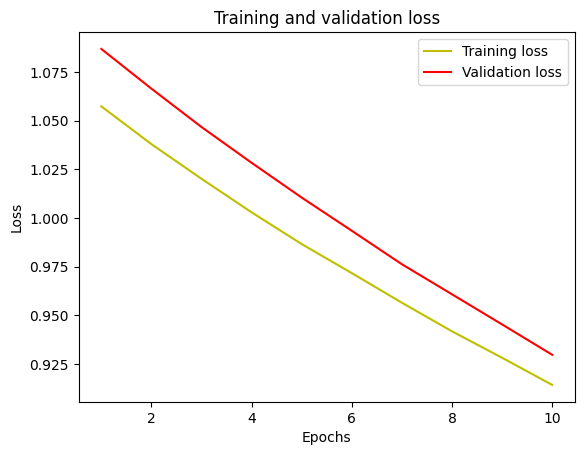

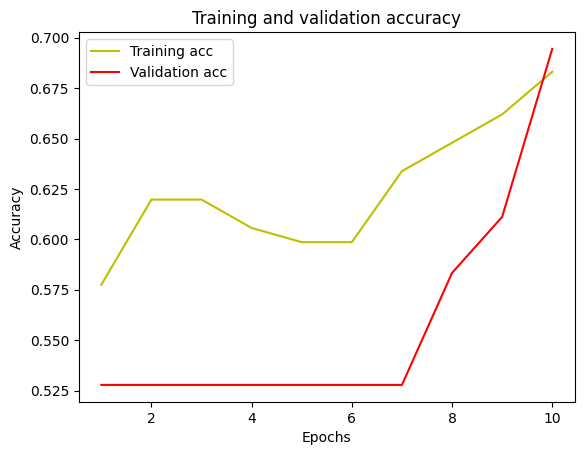

In [5]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()